In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [5]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/SOFTCOM/Assignment3/Dataset 2.csv',encoding="ISO-8859-1")

In [6]:
dataset

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [8]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())

In [9]:
dataset

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [10]:
dataset['text'] = dataset['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [11]:
dataset

,text,polarity
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [12]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['text'].values)
X = tokenizer.texts_to_sequences(dataset['text'].values)
print(X)
X = pad_sequences(X)

[[21, 79, 4, 195, 26, 674, 1, 189, 20, 82], [10, 498], [], [104, 2, 573, 844, 2, 8, 136, 1, 485, 152, 2, 8, 198, 27, 1617, 1332, 187], [414, 17, 16, 699], [20, 1083, 26, 314, 179, 187], [967, 61, 164, 243, 270, 242, 2, 3, 130, 341, 51, 49, 36, 31, 310, 22, 1465, 39], [1466, 58, 1249, 60, 128], [700, 1250, 13, 3, 71], [83, 331, 878, 2, 6], [26, 102, 744], [228, 1, 21, 1333, 8, 374, 360, 243, 4, 374, 37, 16, 3, 1467, 397, 1786], [88, 38, 131, 57, 814, 88, 38, 32, 701, 57, 21, 406, 206, 16, 574], [162, 1, 406, 15, 657, 12, 29, 144, 49, 6, 158, 639], [1, 76, 34, 5], [24, 1, 35, 49, 207, 12, 32], [62, 1, 229, 230, 153, 8, 374, 95, 19, 2, 38, 4, 415, 2, 23, 657, 16], [], [259, 126, 37, 2, 444, 5, 19, 2, 275, 70, 305, 12, 10, 4, 26, 174, 1, 35, 8, 272], [1, 21, 247, 40, 23, 69, 272, 772, 98, 845], [390, 94, 575, 2, 190, 31, 36, 1, 77, 95, 208, 1468, 532], [846, 54, 5, 11, 452, 17, 1, 19, 91, 1334, 1, 279, 66, 2, 3, 209], [159, 165, 25, 24, 8, 1251, 20, 154, 1469, 319], [3, 212, 4, 50, 1, 108,

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
embed_dim = 128
lstm_out = 196
model = Sequential()

model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out,return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(LSTM(lstm_out,return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(LSTM(lstm_out, recurrent_dropout=0.5)))
model.add(Dense(2,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 63, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 63, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 63, 392)           509600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 63, 392)           923552    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 392)               923552    
_________________________________________________________________
dense (Dense)                (None, 2)                 786       
Total params: 2,613,490
Trainable params: 2,613,490
Non-trainable params: 0
______________________________________________

In [14]:
X.shape

(10314, 63)

In [15]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(dataset['polarity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)


In [16]:
X_train

array([[   0,    0,    0, ...,   99,    2, 1836],
       [   0,    0,    0, ...,    4,  317,   12],
       [   0,    0,    0, ..., 1049,  439,  518],
       ...,
       [   0,    0,    0, ...,    0,    8, 1064],
       [   0,    0,    0, ...,    6,   60,  823],
       [   0,    0,    0, ...,  232,   17,  337]], dtype=int32)

In [17]:
X_test

array([[   0,    0,    0, ...,  575,    2,   12],
       [   0,    0,    0, ...,  112,   11,    6],
       [   0,    0,    0, ..., 1371,   14,    4],
       ...,
       [   0,    0,    0, ...,   23,   69,  450],
       [   0,    0,    0, ...,    6,  119,   78],
       [   0,    0,    0, ...,    0,  385, 1166]], dtype=int32)

In [18]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7219, 63) (7219, 2)
(3095, 63) (3095, 2)


In [19]:
#Learning rate=0.01
batch_size = 32
history=model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size)

Epoch 1/7
226/226 [==============================] - 407s 2s/step - loss: 0.1537 - true_positives: 6829.0000 - true_negatives: 6829.0000 - false_positives: 390.0000 - false_negatives: 390.0000 - accuracy: 0.9460
Epoch 2/7
226/226 [==============================] - 392s 2s/step - loss: 0.0569 - true_positives: 7131.0000 - true_negatives: 7131.0000 - false_positives: 88.0000 - false_negatives: 88.0000 - accuracy: 0.9878
Epoch 3/7
226/226 [==============================] - 387s 2s/step - loss: 0.0353 - true_positives: 7165.0000 - true_negatives: 7165.0000 - false_positives: 54.0000 - false_negatives: 54.0000 - accuracy: 0.9925
Epoch 4/7
226/226 [==============================] - 381s 2s/step - loss: 0.0201 - true_positives: 7191.0000 - true_negatives: 7191.0000 - false_positives: 28.0000 - false_negatives: 28.0000 - accuracy: 0.9961
Epoch 5/7
226/226 [==============================] - 378s 2s/step - loss: 0.0179 - true_positives: 7189.0000 - true_negatives: 7189.0000 - false_positives: 30

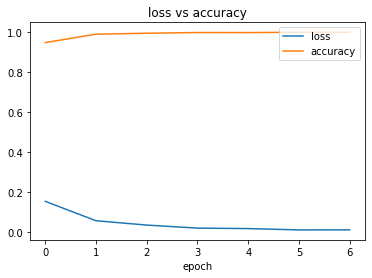

In [20]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


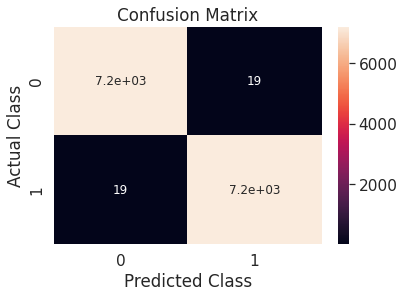

In [21]:
import seaborn as sn
array = [[history.history['true_positives'][-1],history.history['false_positives'][-1]],
         [history.history['false_negatives'][-1],history.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()

In [22]:
model.evaluate(X_test,Y_test)

97/97 [==============================] - 20s 190ms/step - loss: 0.0666 - true_positives: 3065.0000 - true_negatives: 3065.0000 - false_positives: 30.0000 - false_negatives: 30.0000 - accuracy: 0.9903


[0.06660749018192291, 3065.0, 3065.0, 30.0, 30.0, 0.9903069734573364]

In [23]:
from sklearn.metrics import classification_report
Y_preds=tf.round(model.predict(X_test))
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2423
           1       0.99      0.96      0.98       672

   micro avg       0.99      0.99      0.99      3095
   macro avg       0.99      0.98      0.99      3095
weighted avg       0.99      0.99      0.99      3095
 samples avg       0.99      0.99      0.99      3095

